**Imports**

In [1]:
# Imports:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


**Lengthy objects**

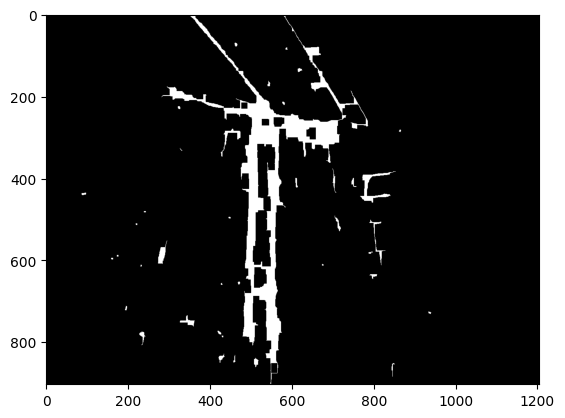

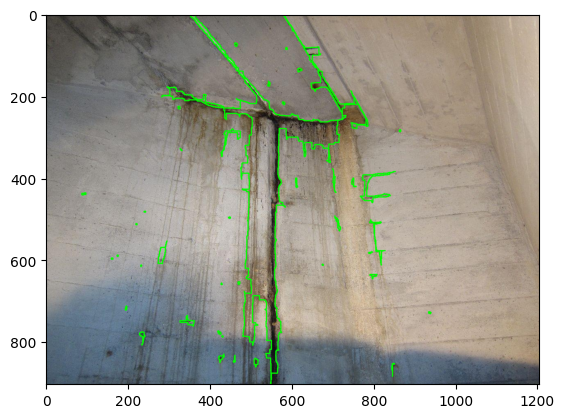

In [46]:
# Read in image:
path = "data/dacl10k_v2_devphase/images/train/"
file = "dacl10k_v2_train_0645.jpg"
image_path = path + file
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Blur image:
gray_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Apply edge detector:
edges = cv2.Canny(gray_image, 50, 150)

# Apply morphological operations 
kernel = np.ones((15, 15), np.uint8)
edges = cv2.dilate(edges, kernel, iterations=1)
edges = cv2.erode(edges, kernel, iterations=1)

## Display
plt.imshow(edges, cmap='gray')
plt.show()

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

## Display
image_contours = image.copy()
cv2.drawContours(image_contours, contours, -1, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(image_contours, cv2.COLOR_BGR2RGB))
plt.show()

# Extract characteristics per contour:
characteristics = []

for contour in contours:

    # Get fitted bounding box
    rect = cv2.minAreaRect(contour)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    width = rect[1][0]
    height = rect[1][1]
    
    # Calculate aspect ratio
    aspect_ratio = float(min(width, height)) / max(width, height)
    characteristics.append(aspect_ratio)

characteristics
